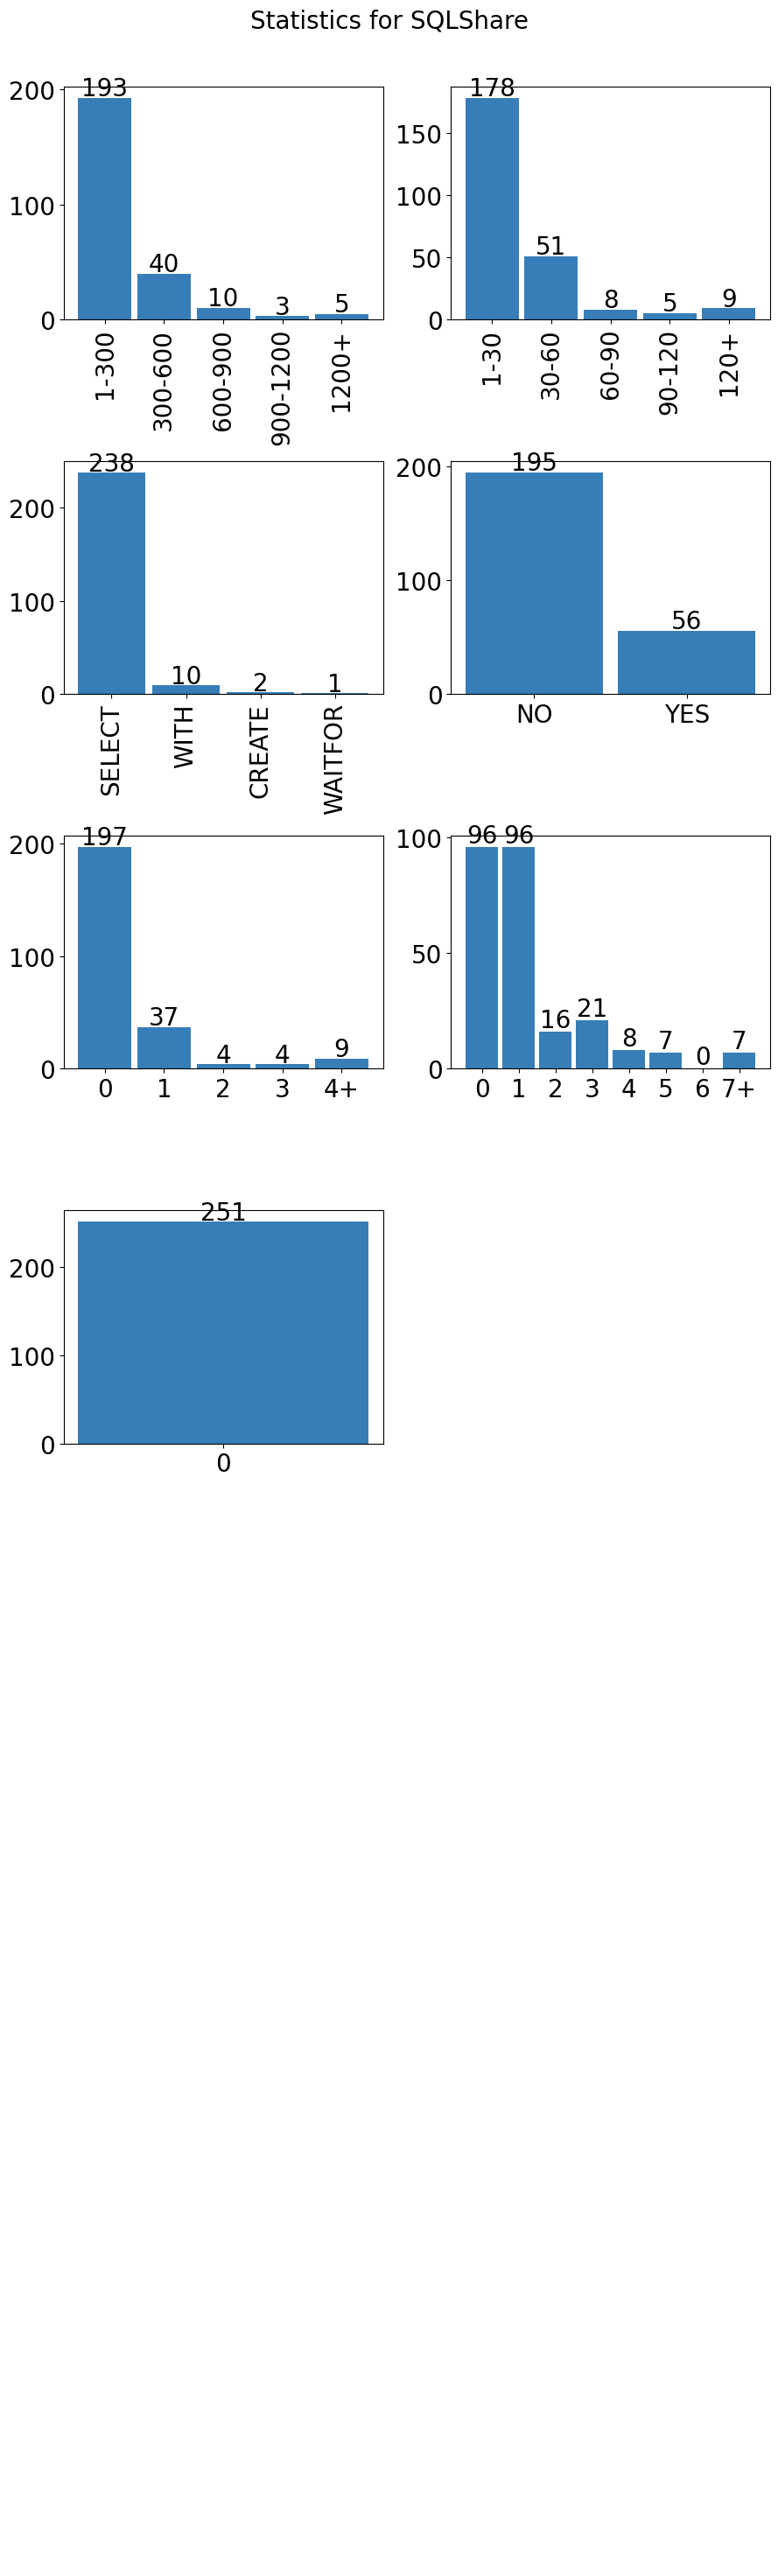

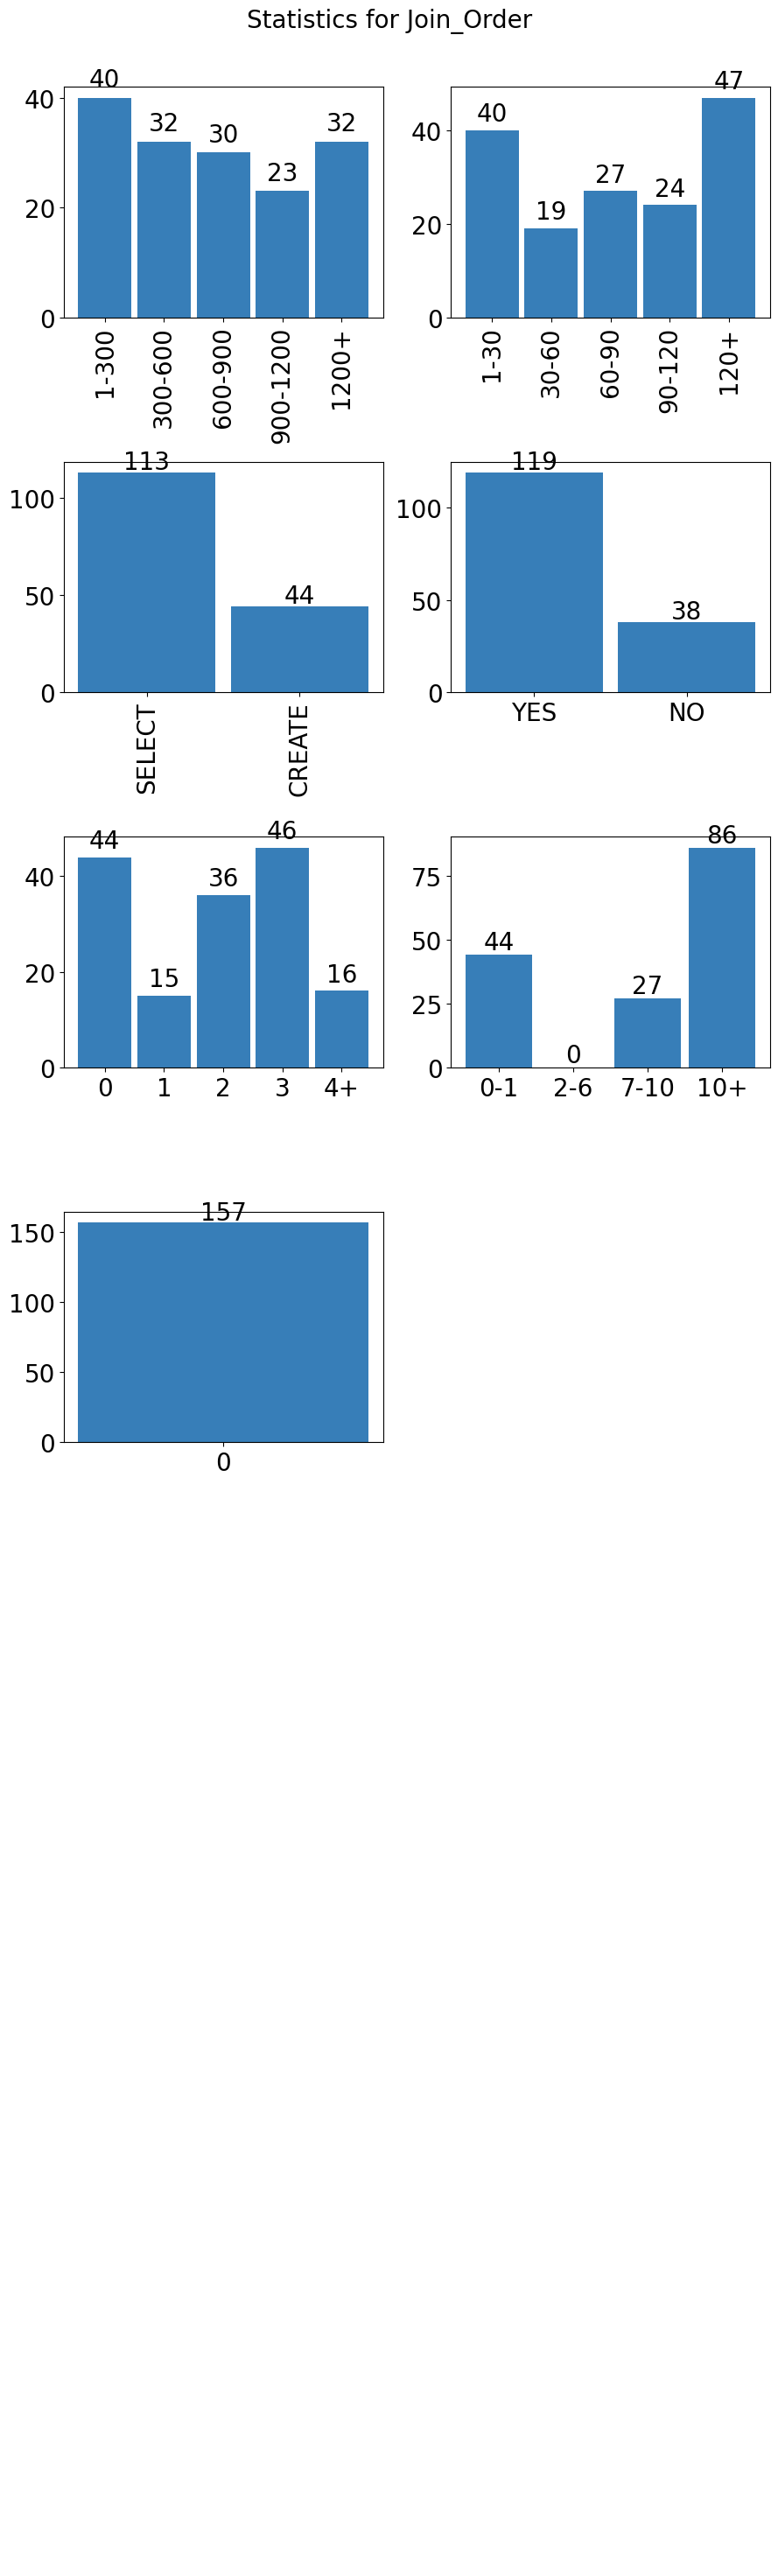

In [4]:
#works well for query length and word count
import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 20
nfsize = 20  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Convert 'Function_Count' and 'Predicate_Count' to integer to ensure proper binning and comparisons
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        if workload_name == 'Join_Order':
            bins_predicate_count = [0, 2, 7, 11, float('inf')]  # Custom bins for Join_Order
            labels_predicate_count = ["0-1", "2-6", "7-10", "10+"]
        else:
            bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
            labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    # Handle Nestedness_Level for all datasets, setting to 0 for Join_Order
    if 'Nestedness_Level' in data.columns:
        if workload_name == 'Join_Order':
            data['Nestedness_Level'] = 0  # Set all values to 0 for the Join_Order dataset
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)

    #Define custom bins and labels for other categories
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Query_Length']) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count']) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]
    
    #for spider
    #bins_query_length = [0, 100, 200, 300, 400, max(data['Query_Length']) + 1]
    #labels_query_length = ["1-100","100-200", "200-300", "300-400", "401+"]
    #bins_word_count = [0, 20, 40, 60, max(data['Word_Count']) + 1]
    #labels_word_count = ["1-20","20-40","40-60", "61+"]

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))  # Adjusted rows to accommodate additional plots
    axes = axes.flatten()  # Flatten to access via single index

    # List of data for each subplot
    data_list = [
        (pd.cut(data['Query_Length'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Query Length', f'{workload_name}_query_length'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (pd.Series([len(data)], index=['0']).sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level')  # Explicitly setting all Nestedness_Level counts to '0'
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)

        # Rotate x-tick labels vertically for specific plots
        if xlabel in ['Query Length', 'Word Count', 'Query Type']:
            ax.tick_params(axis='x', labelsize=fsize, rotation=90)
        else:
            ax.tick_params(axis='x', labelsize=fsize)

        # Generate PDFs if the flag is set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=90 if xlabel in ['Query Length', 'Word Count', 'Query Type'] else 0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    # Hide unused subplot spaces
    if len(data_list) < len(axes):
        for i in range(len(data_list), len(axes)):
            axes[i].axis('off')

    # Adjust layout and show the combined plot
    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    #'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    'SQLShare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv",
    'Join_Order': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv",
    #'Spider': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the uploaded files
sqlshare_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare.csv")
join_order_stats = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join.csv")
sdss_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss.csv")
spider_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider.csv")

# Remove 'Nestedness_Level' if it exists
#for stats in [join_order_stats, sdss_stat, spider_stat]:
 #   if 'Nestedness_Level' in stats.columns:
  #      stats.drop(columns=['Nestedness_Level'], inplace=True)

# Calculate the correlation matrices
correlation_sqlshare = sqlshare_stat.corr(numeric_only=True)
correlation_join_order = join_order_stats.corr(numeric_only=True)
correlation_sdss = sdss_stat.corr(numeric_only=True)
correlation_spider = spider_stat.corr(numeric_only=True)

# Define a color-blind friendly color palette
color_blind_palette = "viridis"

# Define a function to plot and save heatmap
def plot_and_save_heatmap(correlation, dataset_name, filename):
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation, annot=True, cmap=color_blind_palette, fmt=".2f", annot_kws={'size': 20})
    plt.xticks(fontsize=20)  # Ensure font sizes are consistent with previous plots
    plt.yticks(fontsize=20)  # Ensure font sizes are consistent with previous plots
    #plt.title(f'{dataset_name} Dataset Correlation', fontsize=22)  # Set title to indicate the dataset
    plt.xlabel('')  # Remove x-label as you requested no labels
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')  # Save the figure correctly formatted
    plt.close()

# Call the function for each dataset
plot_and_save_heatmap(correlation_sqlshare, 'SQLShare', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\SQLShare_Correlation.pdf")
plot_and_save_heatmap(correlation_join_order, 'Join-Order', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\Join_Order_Correlation.pdf")
plot_and_save_heatmap(correlation_sdss, 'SDSS', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\SDSS_Correlation.pdf")
plot_and_save_heatmap(correlation_spider, 'Spider', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\Spider_Correlation.pdf")


In [25]:
#does not have y label
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the uploaded files
sqlshare_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare.csv")
join_order_stats = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join.csv")
sdss_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss.csv")
spider_stat = pd.read_csv("C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider.csv")

# Calculate the correlation matrices
correlation_sqlshare = sqlshare_stat.corr(numeric_only=True)
correlation_join_order = join_order_stats.corr(numeric_only=True)
correlation_sdss = sdss_stat.corr(numeric_only=True)
correlation_spider = spider_stat.corr(numeric_only=True)

# Define a color-blind friendly color palette
color_blind_palette = "viridis"

# Define a function to plot and save heatmap
def plot_and_save_heatmap(correlation, dataset_name, filename):
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation, annot=True, cmap=color_blind_palette, fmt=".2f", annot_kws={'size': 20})
    plt.xticks(fontsize=20)  # Ensure font sizes are consistent with previous plots
    plt.yticks([])  # Remove y-tick labels entirely
    plt.xlabel('')  # No x-labels
    plt.ylabel('')  # No y-labels
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')  # Save the figure correctly formatted
    plt.close()

# Call the function for each dataset
plot_and_save_heatmap(correlation_sqlshare, 'SQLShare', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\SQLShare_Correlation.pdf")
plot_and_save_heatmap(correlation_join_order, 'Join-Order', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\Join_Order_Correlation.pdf")
plot_and_save_heatmap(correlation_sdss, 'SDSS', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\SDSS_Correlation.pdf")
plot_and_save_heatmap(correlation_spider, 'Spider', "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\Spider_Correlation.pdf")


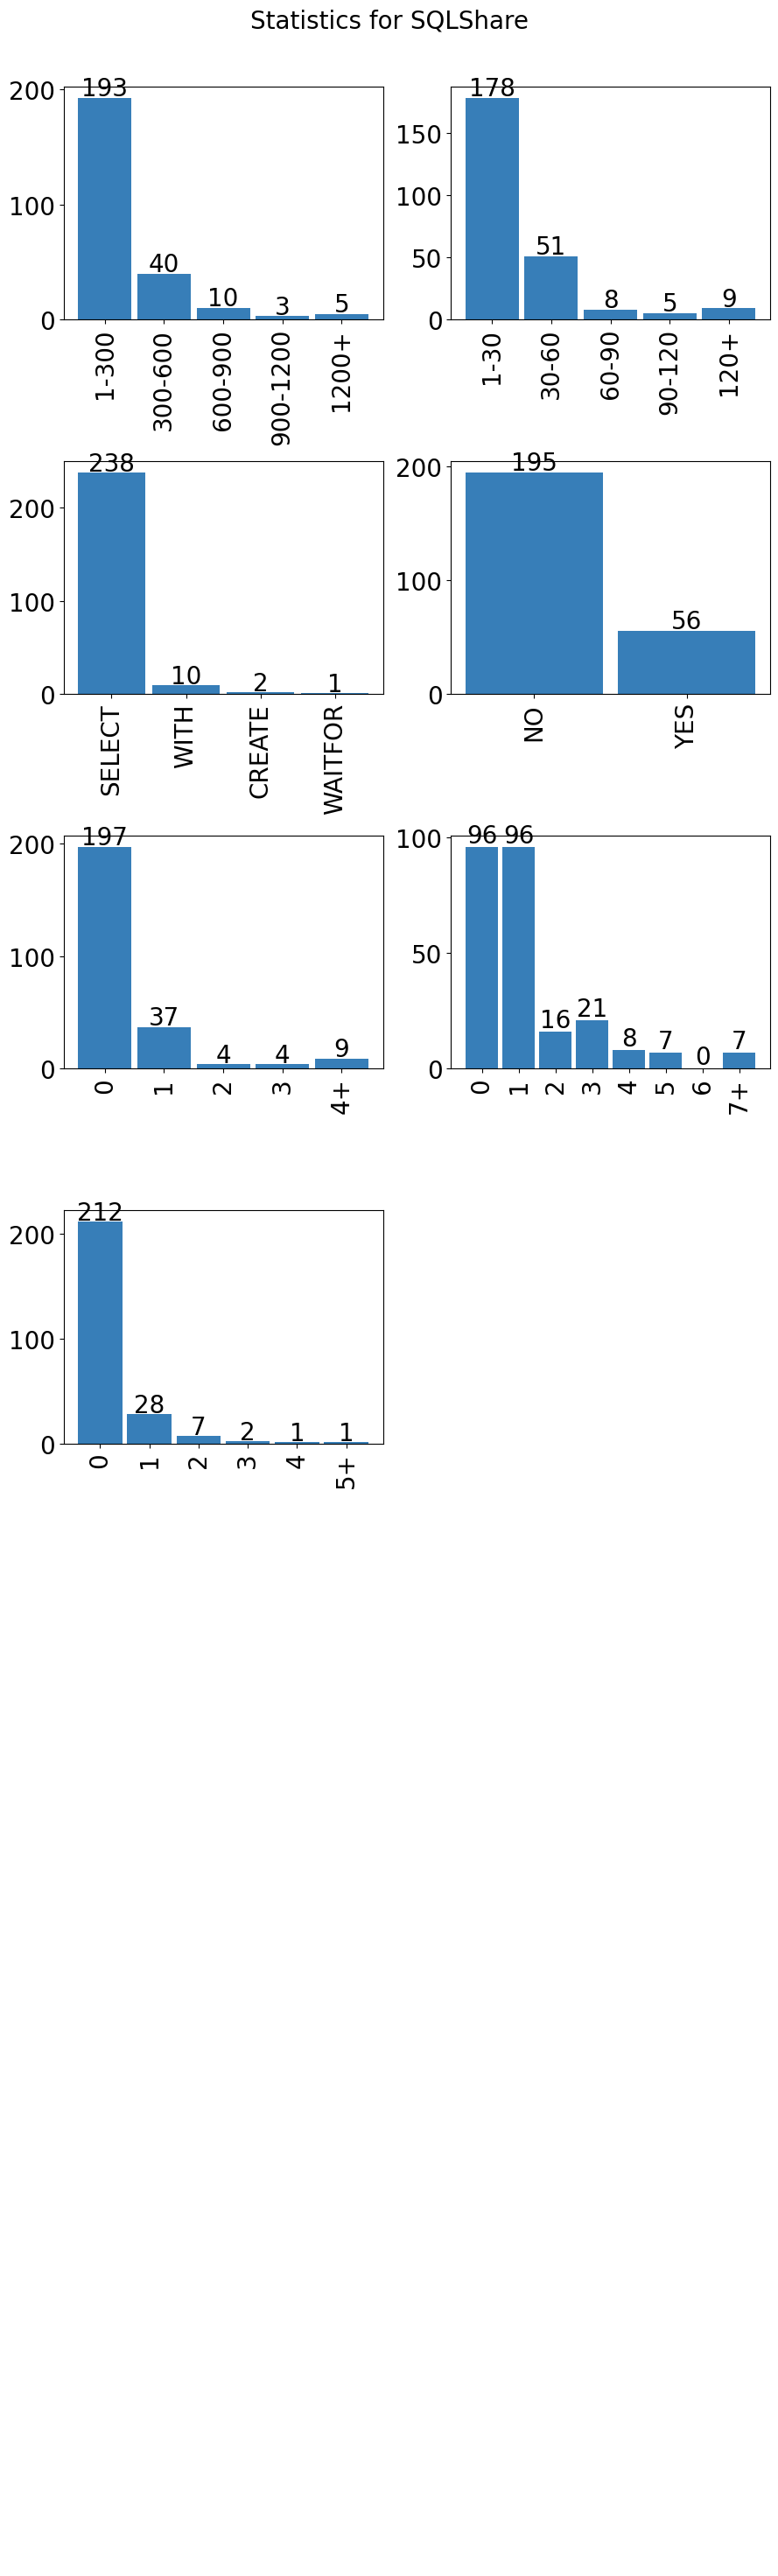

In [48]:
#works well
import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 20
nfsize = 20  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Convert 'Function_Count', 'Predicate_Count', and 'Nestedness_Level' to integer to ensure proper binning and comparisons
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
        labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    if 'Nestedness_Level' in data.columns:
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)
        nestedness_bins = [0, 1, 2, 3,4,5,6]  # Corrected bin edges
        nestedness_labels = ["0", "1", "2","3","4","5+"]  # Corrected labels
        data['Nestedness_Level_Range'] = pd.cut(data['Nestedness_Level'], bins=nestedness_bins, labels=nestedness_labels, right=False)

    # Define custom bins and labels for other categories
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Query_Length'].max(), 1200) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count'].max(), 120) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # List of data for each subplot
    data_list = [
        (pd.cut(data['Query_Length'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Query Length', f'{workload_name}_query_length'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Nestedness_Level_Range'].value_counts().sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level')
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)

        # Generate PDFs if the flag is set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    # Hide unused subplot spaces
    if len(data_list) < len(axes):
        for i in range(len(data_list), len(axes)):
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    'SQLShare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv",
    'Join_Order': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv",
    #'Spider': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


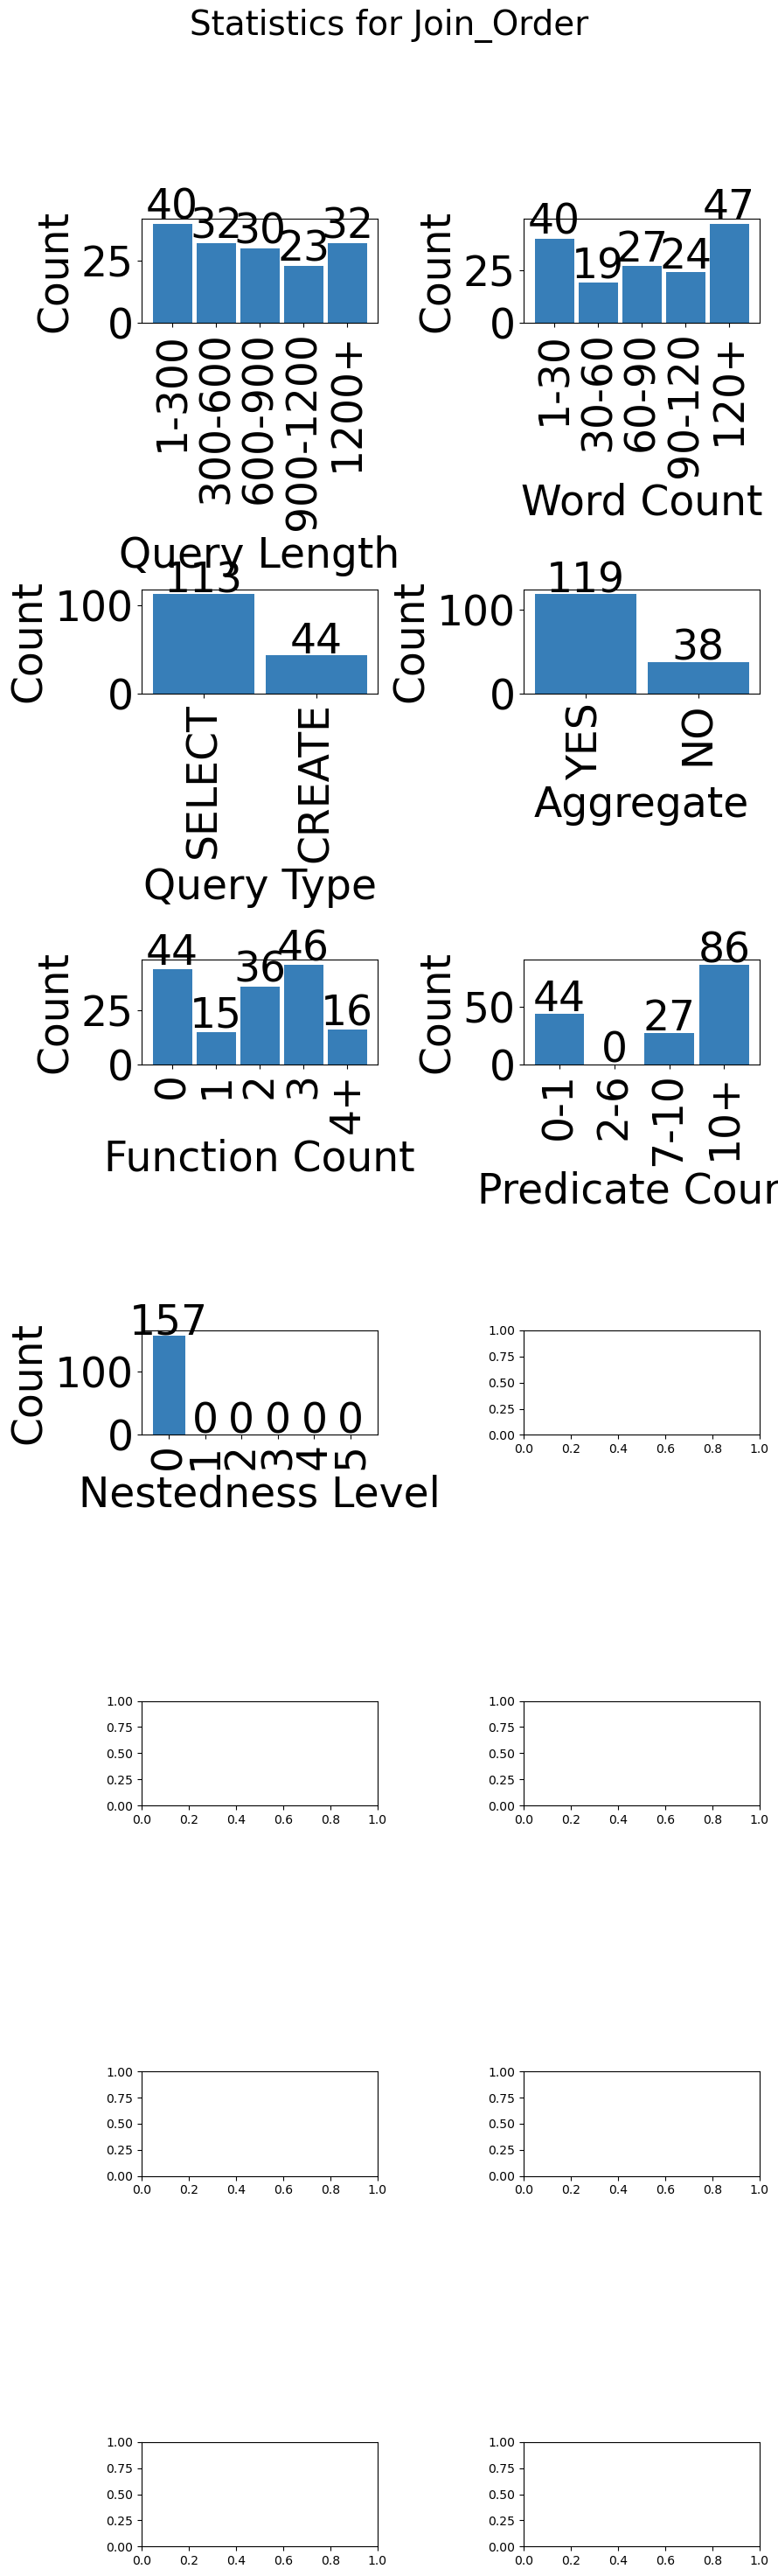

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 34  # General font size for ticks and labels (increased for better visibility in PDF)
title_size = 28  # Font size for titles (increased for better visibility)
nfsize = 34  # Font size for numbers written on top of the bars (increased for better visibility)

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Convert and categorize relevant data fields
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    #if 'Predicate_Count' in data.columns:
    #    data['Predicate_Count'] = data['Predicate_Count'].astype(int)
     #   bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
      #  labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
       # data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)
    #for join-order dataset    
    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        # Define new bins for the ranges specified: 0-1, 2-6, 7-10, 10+
        bins_predicate_count = [0, 2, 7, 11, float('inf')]
        # Define labels for these bins
        labels_predicate_count = ["0-1", "2-6", "7-10", "10+"]
        # Use pd.cut to categorize the data into these bins
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    if 'Nestedness_Level' in data.columns:
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)
        nestedness_bins = [0, 1, 2, 3, 4, 5, 6]
        nestedness_labels = ["0", "1", "2", "3", "4", "5"]
        data['Nestedness_Level_Range'] = pd.cut(data['Nestedness_Level'], bins=nestedness_bins, labels=nestedness_labels, right=False)

    # Define custom bins and labels for other categories
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Query_Length'].max(), 1200) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count'].max(), 120) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]

    data_list = [
        (pd.cut(data['Query_Length'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Query Length', f'{workload_name}_query_length'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Nestedness_Level_Range'].value_counts().sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level')
    ]

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)
        ax.set_xlabel(xlabel, fontsize=fsize)
        ax.set_ylabel('Count', fontsize=fsize)

        # Generate PDFs if the flag is set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(8, 8))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=title_size)
    plt.subplots_adjust(top=0.90)
    plt.show()

# Example usage with provided datasets
workloads = {
    #'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    #'SQLShare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv",
    'Join_Order': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


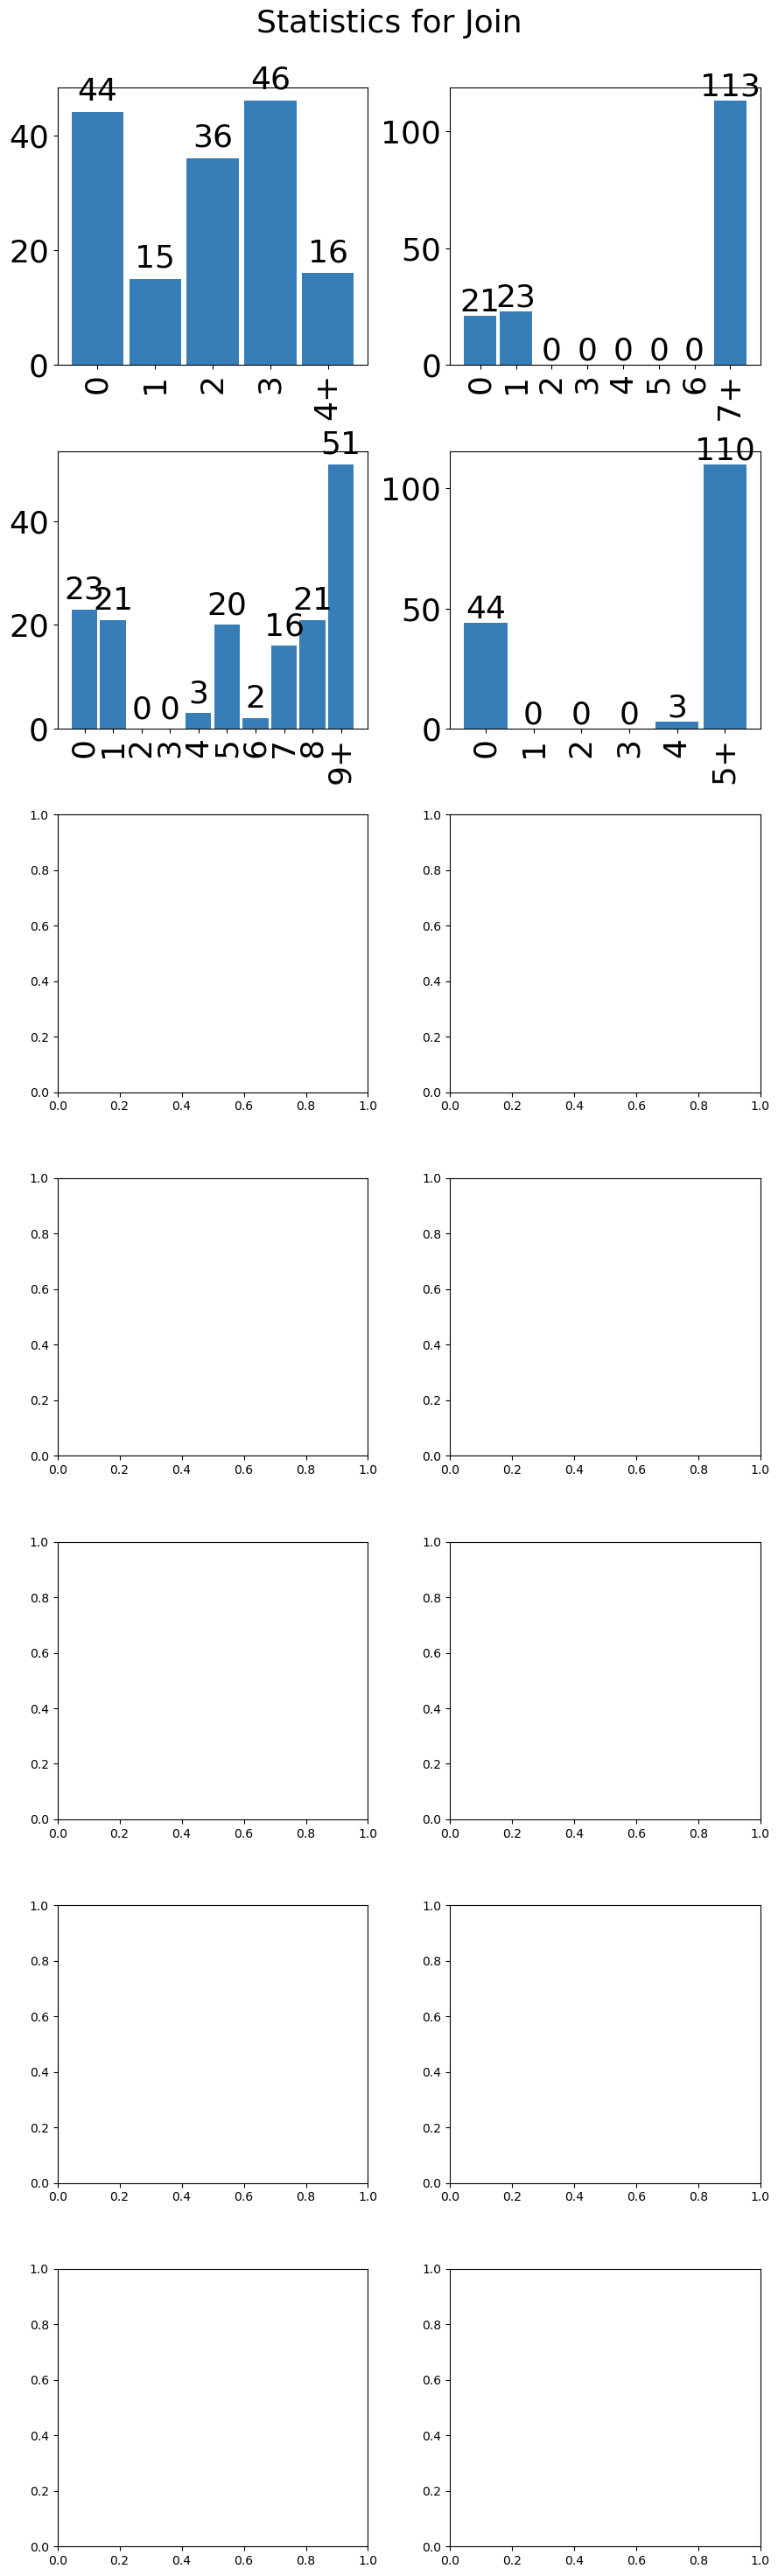

In [33]:
#table count and join count
import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 26
nfsize = 26  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Make sure each expected column exists and handle appropriately if not
    expected_columns = ['Function_Count', 'Predicate_Count', 'Nestedness_Level', 'Table_Count', 'Join_Count']
    for column in expected_columns:
        if column not in data.columns:
            data[column] = 0  # Assign a default value if the column is missing

    data['Function_Count'] = data['Function_Count'].fillna(0).astype(int)
    data['Predicate_Count'] = data['Predicate_Count'].fillna(0).astype(int)
    data['Nestedness_Level'] = data['Nestedness_Level'].fillna(0).astype(int)
    data['Table_Count'] = data['Table_Count'].fillna(0).astype(int)
    data['Join_Count'] = data['Join_Count'].fillna(0).astype(int)

    # Define bins and labels for Function Count, Predicate Count, etc.
    bins_function_count = [0, 1, 2, 3, 4, float('inf')]
    labels_function_count = ["0", "1", "2", "3", "4+"]
    data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, float('inf')]
    labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
    data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    # Additional handling for Table Count and Join Count as per your specifications
    table_bins = [0, 1, 2, 3, 4, 5, 6,7,8,9, float('inf')]
    table_labels = ["0", "1", "2", "3", "4", "5", "6","7","8","9+"]
    data['Table_Count_Range'] = pd.cut(data['Table_Count'], bins=table_bins, labels=table_labels, right=False)

    join_bins = [0, 1, 2, 3, 4, 5, float('inf')]
    join_labels = ["0", "1", "2", "3", "4", "5+"]
    data['Join_Count_Range'] = pd.cut(data['Join_Count'], bins=join_bins, labels=join_labels, right=False)

    # Setup figure for plotting
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # Prepare data for plotting
    data_list = [
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Table_Count_Range'].value_counts().sort_index(), 'Table Count', f'{workload_name}_table_count'),
        (data['Join_Count_Range'].value_counts().sort_index(), 'Join Count', f'{workload_name}_join_count')
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        #ax.set_xlabel(xlabel, fontsize=fsize)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)

        # Generate PDFs if set
        if generate_pdfs:
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            #ax_individual.set_xlabel(xlabel, fontsize=fsize)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{filename}.pdf", bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    #'Spider': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\spider_stats.csv"
    #'SDSS': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
    #'Sqlshare': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sqlshare_stats.csv"
    'Join': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\join_stats.csv"
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)


Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Query_Length.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Word_Count.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Query_Type.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Aggregate.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Function_Count.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Predicate_Count.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Nestedness_Level.pdf
Saved PDF to C:\Users\anany\OneDrive\Desktop\MS_Thesis\plots\sdss_Column_Count.pdf


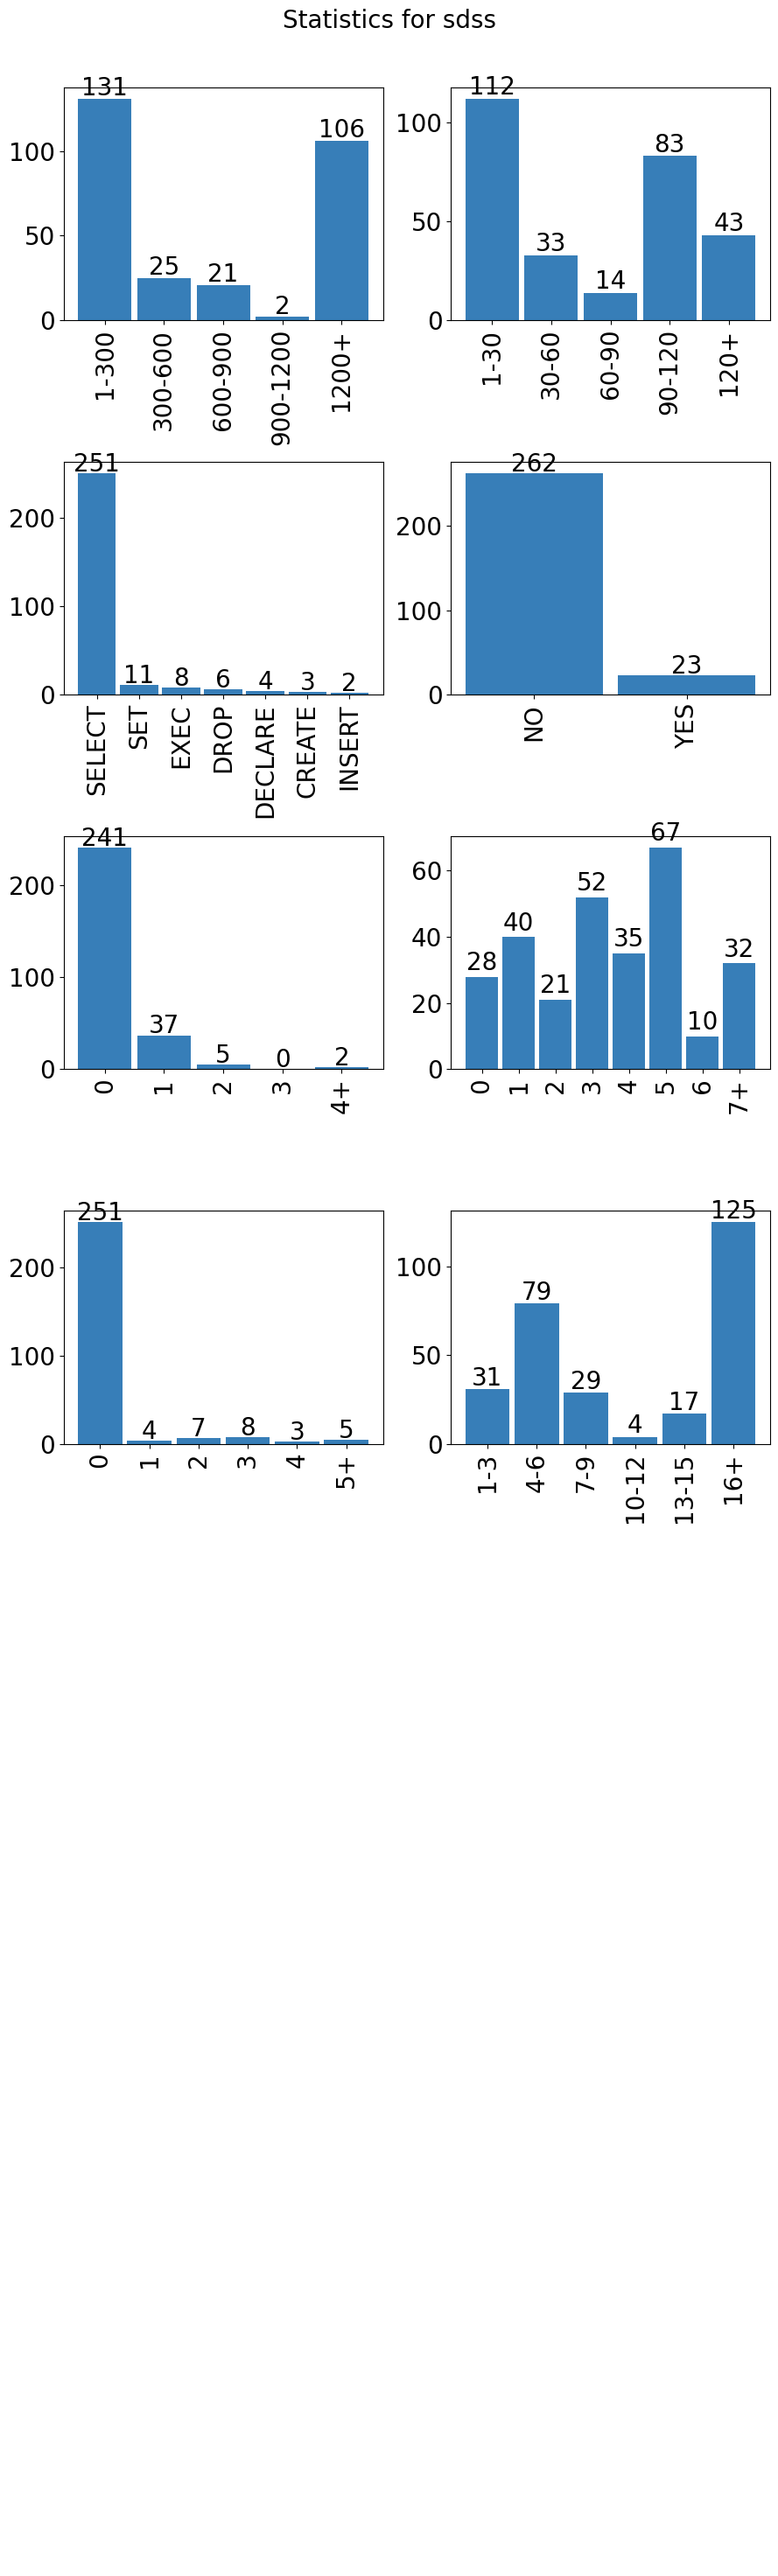

In [1]:
#works well for column count
import pandas as pd
import matplotlib.pyplot as plt

# Define color-blind friendly color
color = '#377eb8'
fsize = 20
nfsize = 20  # Font size for numbers written on top of the bars

# Helper function to add labels above the bars
def add_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=nfsize)

# Function to plot statistics for a given dataset
def plot_statistics(data, workload_name, generate_pdfs=False):
    # Define custom bins and labels for various metrics
    bins_query_length = [0, 300, 600, 900, 1200, max(data['Query_Length'].max(), 1200) + 1]
    labels_query_length = ["1-300", "300-600", "600-900", "900-1200", "1200+"]
    bins_word_count = [0, 30, 60, 90, 120, max(data['Word_Count'].max(), 120) + 1]
    labels_word_count = ["1-30", "30-60", "60-90", "90-120", "120+"]

    # Convert 'Function_Count', 'Predicate_Count', and 'Nestedness_Level' to integer
    if 'Function_Count' in data.columns:
        data['Function_Count'] = data['Function_Count'].astype(int)
        bins_function_count = [0, 1, 2, 3, 4, max(data['Function_Count'].max(), 10) + 1]
        labels_function_count = ["0", "1", "2", "3", "4+"]
        data['Function_Count_Range'] = pd.cut(data['Function_Count'], bins=bins_function_count, labels=labels_function_count, right=False)

    if 'Predicate_Count' in data.columns:
        data['Predicate_Count'] = data['Predicate_Count'].astype(int)
        bins_predicate_count = [0, 1, 2, 3, 4, 5, 6, 7, max(data['Predicate_Count'].max(), 10) + 1]
        labels_predicate_count = ["0", "1", "2", "3", "4", "5", "6", "7+"]
        data['Predicate_Count_Range'] = pd.cut(data['Predicate_Count'], bins=bins_predicate_count, labels=labels_predicate_count, right=False)

    if 'Nestedness_Level' in data.columns:
        data['Nestedness_Level'] = data['Nestedness_Level'].astype(int)
        nestedness_bins = [0, 1, 2, 3, 4, 5, 6]
        nestedness_labels = ["0", "1", "2", "3", "4", "5+"]
        data['Nestedness_Level_Range'] = pd.cut(data['Nestedness_Level'], bins=nestedness_bins, labels=nestedness_labels, right=False)

    if 'Column_Count' in data.columns:
        data['Column_Count'] = data['Column_Count'].astype(int)
        bins_column_count = [0, 3, 6, 9, 12, 15, float('inf')]  # Defines edges of the bins
        labels_column_count = ["1-3", "4-6", "7-9", "10-12", "13-15", "16+"]
        data['Column_Count_Range'] = pd.cut(data['Column_Count'], bins=bins_column_count, labels=labels_column_count, right=False)

    # Set up a figure with multiple subplots
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 30))
    axes = axes.flatten()

    # List of data for each subplot
    data_list = [
        (pd.cut(data['Query_Length'], bins=bins_query_length, labels=labels_query_length).value_counts().sort_index(), 'Query Length', f'{workload_name}_query_length'),
        (pd.cut(data['Word_Count'], bins=bins_word_count, labels=labels_word_count).value_counts().sort_index(), 'Word Count', f'{workload_name}_word_count'),
        (data['Query_Type'].value_counts(), 'Query Type', f'{workload_name}_query_type'),
        (data['Aggregate'].value_counts(), 'Aggregate', f'{workload_name}_aggregate'),
        (data['Function_Count_Range'].value_counts().sort_index(), 'Function Count', f'{workload_name}_function_count'),
        (data['Predicate_Count_Range'].value_counts().sort_index(), 'Predicate Count', f'{workload_name}_predicate_count'),
        (data['Nestedness_Level_Range'].value_counts().sort_index(), 'Nestedness Level', f'{workload_name}_nestedness_level'),
        (data['Column_Count_Range'].value_counts().sort_index(), 'Column Count', f'{workload_name}_column_count')
    ]

    # Iterate over each subplot data and create bar charts
    for ax, (count_data, xlabel, filename) in zip(axes, data_list):
        ax.bar(count_data.index, count_data.values, color=color, width=0.9)
        ax.tick_params(axis='y', labelsize=fsize)
        add_labels(ax, count_data.values)
        ax.tick_params(axis='x', labelsize=fsize, rotation=90)

        # Generate PDFs if the flag is set
        if generate_pdfs:
            pdf_filename = f"C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\plots\\{workload_name}_{xlabel.replace(' ', '_')}.pdf"
            fig_individual, ax_individual = plt.subplots(figsize=(6, 6))
            ax_individual.bar(count_data.index, count_data.values, color=color, width=0.9)
            ax_individual.tick_params(axis='x', labelsize=fsize, rotation=0)
            ax_individual.tick_params(axis='y', labelsize=fsize)
            add_labels(ax_individual, count_data.values)
            fig_individual.tight_layout()
            fig_individual.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)
            plt.close(fig_individual)
            print(f"Saved PDF to {pdf_filename}")

    # Hide unused subplot spaces
    if len(data_list) < len(axes):
        for i in range(len(data_list), len(axes)):
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Statistics for {workload_name}', fontsize=fsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage with provided datasets
workloads = {
    'sdss': "C:\\Users\\anany\\OneDrive\\Desktop\\MS_Thesis\\Stats\\sdss_stats.csv",
}

for workload_name, file_path in workloads.items():
    data = pd.read_csv(file_path)
    plot_statistics(data, workload_name, generate_pdfs=True)
